In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils import shuffle

In [35]:
heart_df = pd.read_csv('heart.csv')
heart_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6


In [36]:
data = heart_df.drop(columns=['target']).values
labels = heart_df['target'].values
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=.2)

In [39]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
model.score(X_train, y_train)

0.8553719008264463

In [41]:
model.score(X_test, y_test)

0.8360655737704918

In [42]:
    X_train = torch.from_numpy(X_train).float()
    y_train = torch.from_numpy(y_train).float().view(-1, 1)
    X_test = torch.from_numpy(X_test).float()
    y_test = torch.from_numpy(y_test).float().view(-1, 1)

In [100]:
class ANN(nn.Module):
    def __init__(self, D):
        super().__init__()
        self.linear1 = nn.Linear(D, 15)
        self.linear2 = nn.Linear(15, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [101]:
model = ANN(X_train.shape[1])

In [102]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [103]:
#number of iterations
epochs = 1200

#used to keep track of the changes in accuracy and loss
running_loss = 0
train_accs = []
test_accs = []
losses = []

#training loop
for e in range(epochs):
    #shuffle the data each loop
    X_train, y_train = shuffle(X_train.numpy(), y_train.numpy())
    X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
    
    #standard training steps
    pred = model.forward(X_train)
    loss = criterion(pred, y_train)
    running_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #store current loss and accuracy for test and training set
    if e%100==0 and e>0:
        running_loss /= 100
#         print("epoch:", e, "loss", running_loss/100)
        losses.append(running_loss)
        running_loss = 0
        pred = torch.round(pred)
        train_acc = torch.sum(pred==y_train).float()/len(pred)
#         print('training accuracy:', train_acc.item())
        train_accs.append(train_acc.item())
        test_pred = model.forward(X_test)
        test_pred = torch.round(test_pred)
        test_acc = torch.sum(test_pred==y_test).float()/len(test_pred)
#         print('test accuracy:', test_acc.item())
        test_accs.append(test_acc.item())
print('Final training accuracy:', train_accs[-1])
print('Final test accuracy:', test_accs[-1])

Final training accuracy: 0.9256198406219482
Final test accuracy: 0.9016393423080444


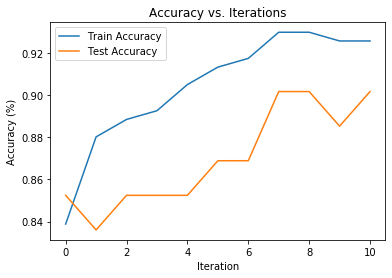

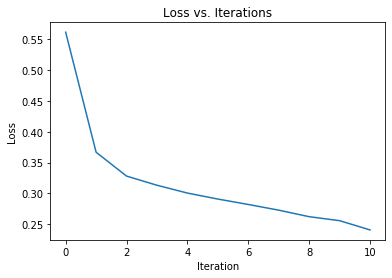

In [104]:
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
plt.plot(losses)
plt.title('Loss vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()